<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="https://drive.google.com/uc?export=view&id=1LkStfZqwS8AOm_xja6KDWWQMQV2ijrDu" width = "300" align="center"/>

EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [3]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
display(df.head())

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

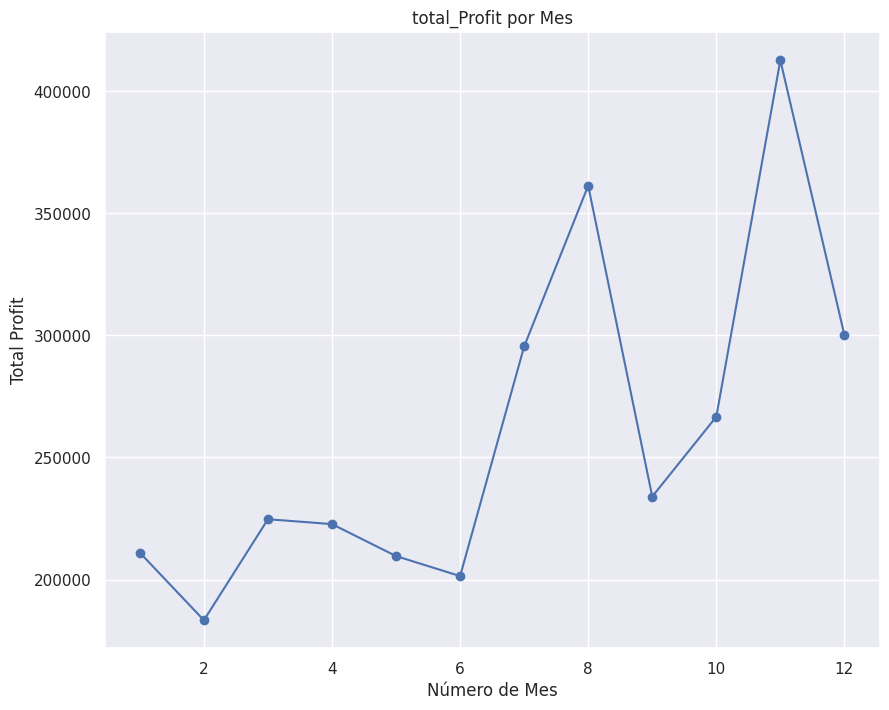

In [4]:
# FIXME
plt.plot(df['month_number'], df['total_profit'], marker='o')
plt.title('total_Profit por Mes')
plt.xlabel('Número de Mes')
plt.ylabel('Total Profit')
plt.show()

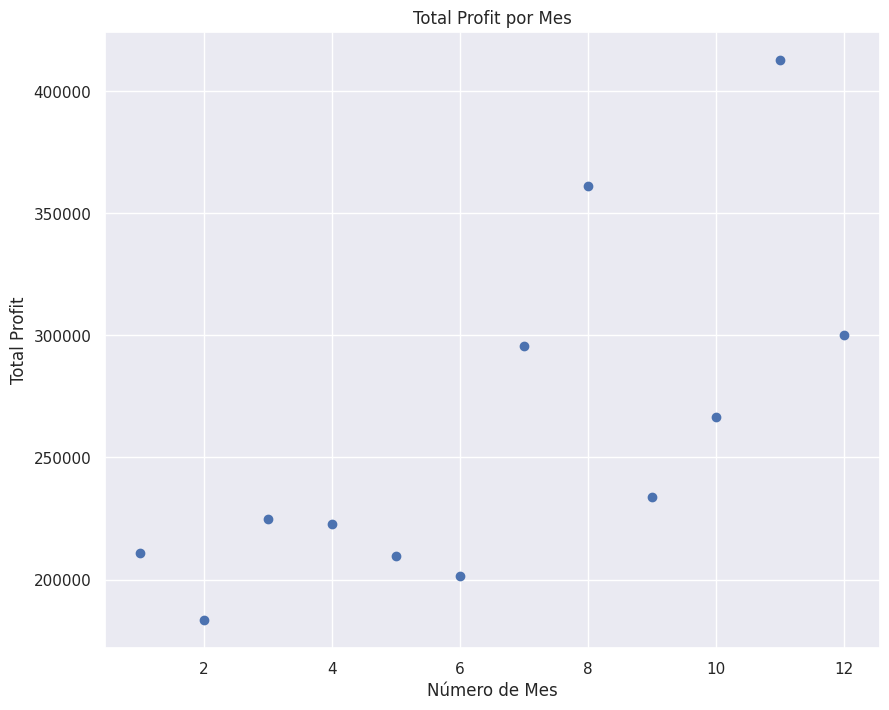

In [5]:
plt.scatter(df['month_number'], df['total_profit'], label='Total Profit')
plt.title('Total Profit por Mes')
plt.xlabel('Número de Mes')
plt.ylabel('Total Profit')
plt.show()

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

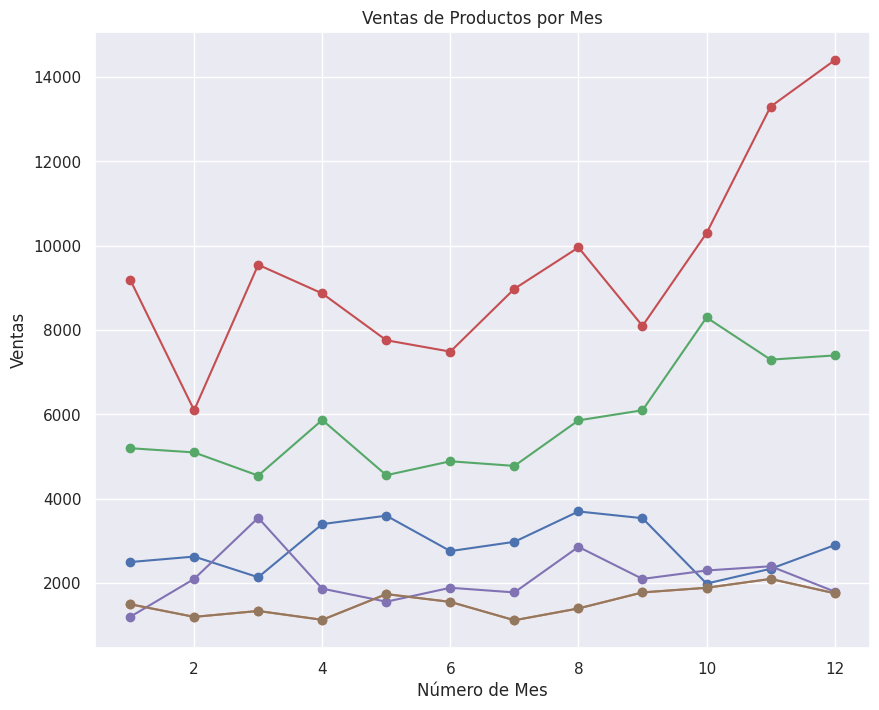

In [7]:
# FIXME

plt.plot(df['month_number'], df['facecream'], label='Face Cream', marker='o')
plt.plot(df['month_number'], df['facewash'], label='Face Wash', marker='o')
plt.plot(df['month_number'], df['toothpaste'], label='Toothpaste', marker='o')
plt.plot(df['month_number'], df['bathingsoap'], label='bathingsoap', marker='o')
plt.plot(df['month_number'], df['shampoo'], label='shampoo', marker='o')
plt.plot(df['month_number'], df['moisturizer'], label='moisturizer', marker='o')

plt.title('Ventas de Productos por Mes')
plt.xlabel('Número de Mes')
plt.ylabel('Ventas')
plt.show()

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

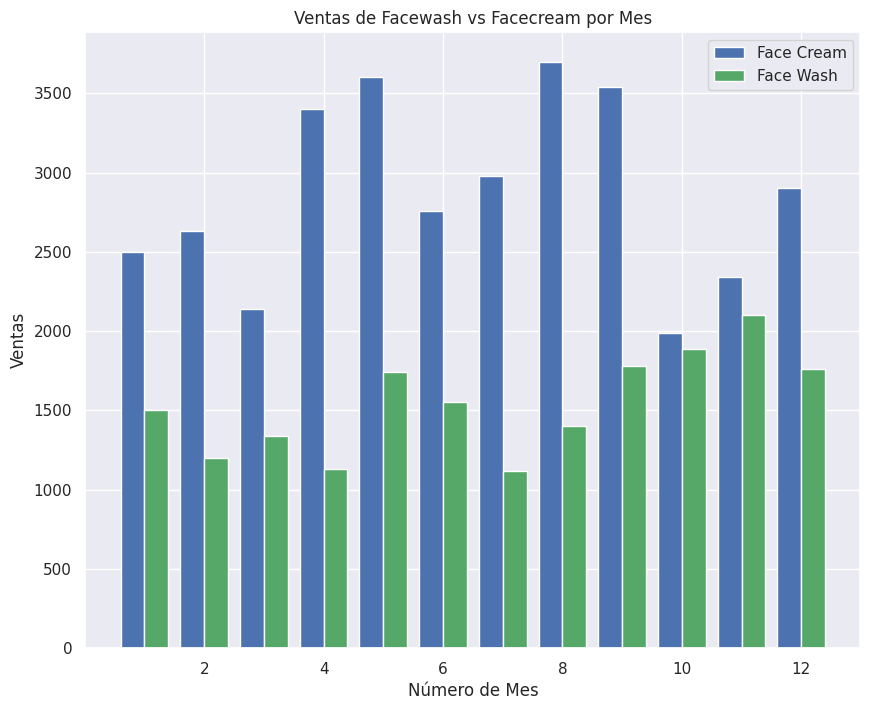

In [8]:
bar_width = 0.4  # Ancho de las barras
bar_positions_facecream = df['month_number'] - bar_width / 2
bar_positions_facewash = df['month_number'] + bar_width / 2

plt.bar(bar_positions_facecream, df['facecream'], width=bar_width, label='Face Cream', color='b')
plt.bar(bar_positions_facewash, df['facewash'], width=bar_width, label='Face Wash', color='g')

plt.title('Ventas de Facewash vs Facecream por Mes')
plt.xlabel('Número de Mes')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

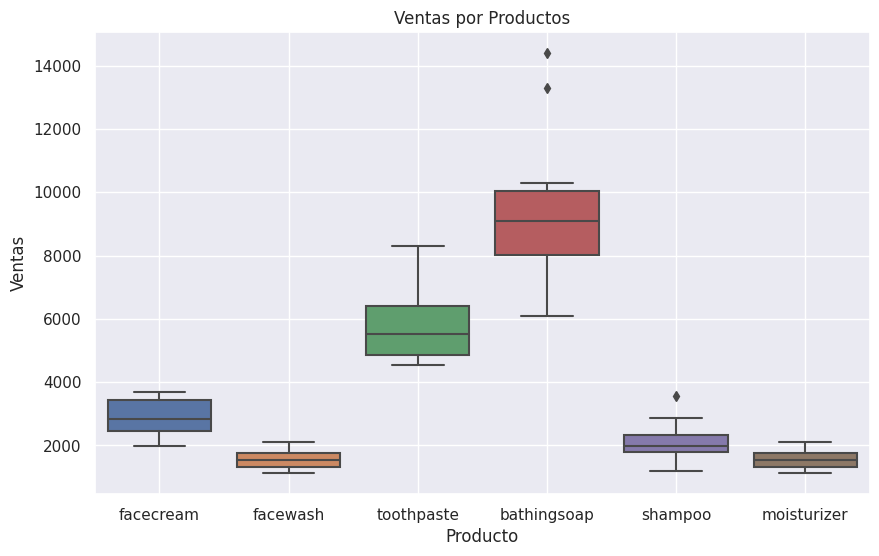

In [9]:
# FIXME
plt.figure(figsize=(10, 6))
df_ex = df[['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']]
sns.boxplot(data=df_ex)
plt.title('Ventas por Productos')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

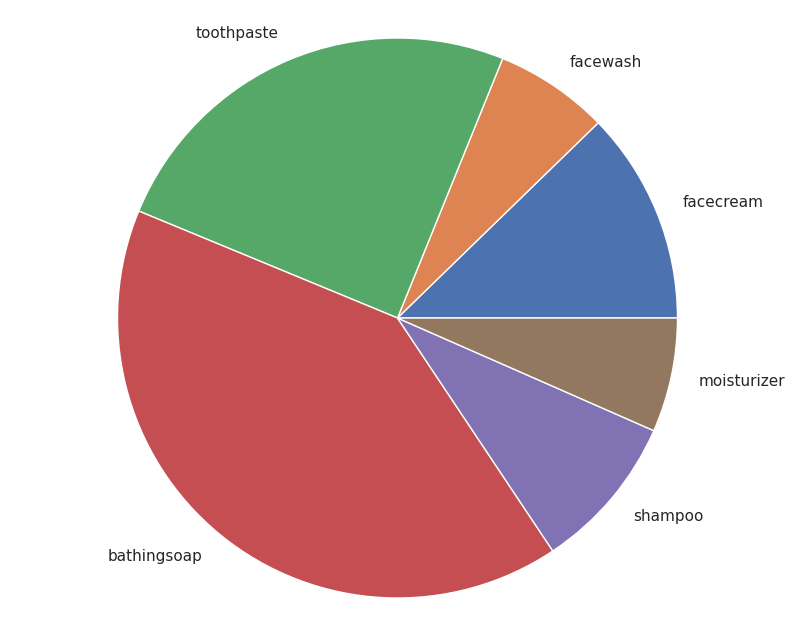

In [10]:
# FIXME
nombres_c = df_ex.columns.tolist()
total_p = []
for i in range(len(nombres_c)):
  sum = df_ex.iloc[:,i].sum()
  total_p.append(sum)

plt.pie(total_p, labels=nombres_c)
plt.axis("equal")
plt.show()